Import required libraries

In [103]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Import the data (stress and strain)

In [104]:
data = pd.read_csv("Al6061_150.csv",encoding = "unicode_escape")

In [105]:
data

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,150,-0.000029,0.192261,Uniaxial tension
1,Al6061,150,-0.000049,0.175688,Uniaxial tension
2,Al6061,150,-0.000083,0.171677,Uniaxial tension
3,Al6061,150,-0.000112,0.319099,Uniaxial tension
4,Al6061,150,-0.000154,0.664752,Uniaxial tension
...,...,...,...,...,...
843,Al6061,150,0.162319,173.197507,Uniaxial tension
844,Al6061,150,0.162465,172.606949,Uniaxial tension
845,Al6061,150,0.162627,172.125882,Uniaxial tension
846,Al6061,150,0.162826,171.479881,Uniaxial tension


Data preparation

In [106]:
data.isnull().sum()

Alloy_Name       0
Temp (°C)        0
Strain           0
Stress_MPa       0
Specimen_Type    0
dtype: int64

In [107]:
data = data.drop([data.index[847]])
data

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,150,-0.000029,0.192261,Uniaxial tension
1,Al6061,150,-0.000049,0.175688,Uniaxial tension
2,Al6061,150,-0.000083,0.171677,Uniaxial tension
3,Al6061,150,-0.000112,0.319099,Uniaxial tension
4,Al6061,150,-0.000154,0.664752,Uniaxial tension
...,...,...,...,...,...
842,Al6061,150,0.161944,174.372188,Uniaxial tension
843,Al6061,150,0.162319,173.197507,Uniaxial tension
844,Al6061,150,0.162465,172.606949,Uniaxial tension
845,Al6061,150,0.162627,172.125882,Uniaxial tension


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alloy_Name     847 non-null    object 
 1   Temp (°C)      847 non-null    int64  
 2   Strain         847 non-null    float64
 3   Stress_MPa     847 non-null    float64
 4   Specimen_Type  847 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.7+ KB


In [109]:
data.describe()

,Temp (°C),Strain,Stress_MPa
count,847.0,847.000000,847.000000
mean,150.0,0.068288,213.599084
std,0.0,0.049594,47.150991
min,150.0,-0.000379,0.171677
25%,150.0,0.023116,220.100601
50%,150.0,0.064003,231.113011
75%,150.0,0.109856,235.657576
max,150.0,0.162826,237.543727


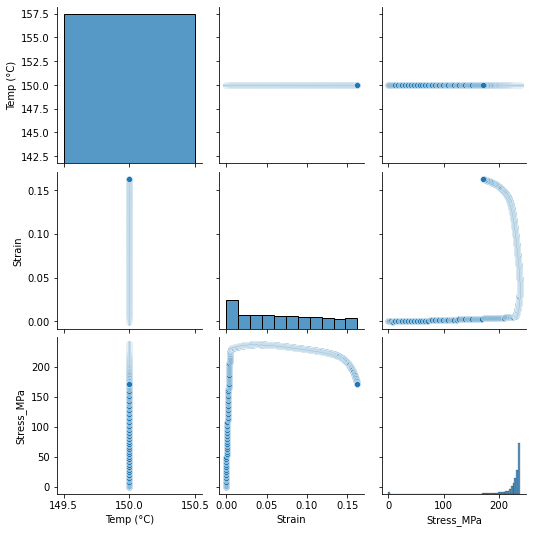

In [110]:
sn.pairplot(data=data)

Data Visualization

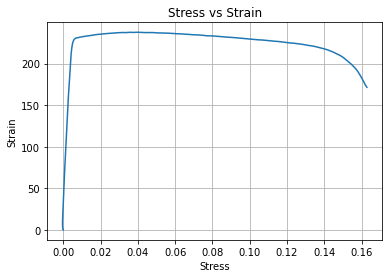

In [111]:
plt.plot(data["Strain"], data["Stress_MPa"])
plt.title("Stress vs Strain")
plt.xlabel("Stress")
plt.ylabel("Strain")
plt.grid()
plt.show()

Linear Regression

In [112]:
row = data.shape[0]
col = data.shape[1]
data.shape

(847, 5)

Linear Regression Algorithm

In [113]:
import random
prop_line = random.randint(0,row)
for i in range(2,row):
    x = pd.DataFrame(data.loc[0:i,['Strain']])
    y = pd.DataFrame(data.loc[0:i,['Stress_MPa']])
    
    model = LinearRegression().fit(x,y)
    y_new = model.predict(x)
    
    r2 = round(r2_score(y,y_new),2)
    if r2 >= 0.95:
        prop_line = i

prop_line

121

In [114]:
#Proportional Points
x1 = data.loc[[prop_line]].Strain
y1 = data.iloc[[prop_line]].Stress_MPa

In [115]:
x = pd.DataFrame(data.loc[0:prop_line,['Strain']])
y = pd.DataFrame(data.loc[0:prop_line,['Stress_MPa']])
model = LinearRegression().fit(x,y)
y_new = model.predict(x) 

Visualization 

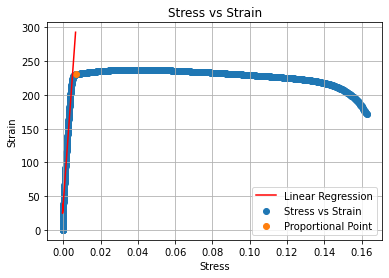

In [116]:
plt.scatter(data["Strain"],data["Stress_MPa"], label="Stress vs Strain")
plt.plot(x,y_new,'r',label="Linear Regression")
plt.scatter(x1,y1,label="Proportional Point")
plt.title("Stress vs Strain")
plt.xlabel("Stress")
plt.ylabel("Strain")
plt.legend()
plt.grid()
plt.show()

In [117]:
#Fracture Point
x4 = data.loc[row-2].Strain
y4 = data.loc[row-2].Stress_MPa

In [118]:
max_stress = data.iloc[data["Stress_MPa"].idxmax()]
x3 = max_stress["Strain"]
y3 = max_stress["Stress_MPa"]

In [138]:
#Yeild Point
data["Offset"] = data["Strain"]+0.002
data

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type,Offset
0,Al6061,150,-0.000029,0.192261,Uniaxial tension,0.001971
1,Al6061,150,-0.000049,0.175688,Uniaxial tension,0.001951
2,Al6061,150,-0.000083,0.171677,Uniaxial tension,0.001917
3,Al6061,150,-0.000112,0.319099,Uniaxial tension,0.001888
4,Al6061,150,-0.000154,0.664752,Uniaxial tension,0.001846
...,...,...,...,...,...,...
842,Al6061,150,0.161944,174.372188,Uniaxial tension,0.163944
843,Al6061,150,0.162319,173.197507,Uniaxial tension,0.164319
844,Al6061,150,0.162465,172.606949,Uniaxial tension,0.164465
845,Al6061,150,0.162627,172.125882,Uniaxial tension,0.164627


In [139]:
x = pd.DataFrame(data.loc[0:prop_line,['Strain']])
y = pd.DataFrame(data.loc[0:prop_line,['Stress_MPa']])

model = LinearRegression().fit(x,y)
y_new = model.predict(x) 

xx = pd.DataFrame(data.loc[0:prop_line,['Offset']])
yy = pd.DataFrame(data.loc[0:prop_line,['Stress_MPa']])

model = LinearRegression().fit(xx,yy)
yy_new = model.predict(xx) 

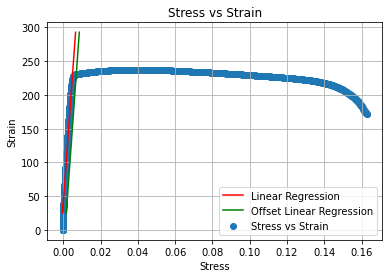

In [140]:
plt.scatter(data["Strain"],data["Stress_MPa"], label="Stress vs Strain")
plt.plot(x,y_new,'r',label="Linear Regression")
plt.plot(xx,yy_new,'g',label="Offset Linear Regression")
plt.title("Stress vs Strain")
plt.xlabel("Stress")
plt.ylabel("Strain")
plt.legend()
plt.grid()
plt.show()

In [141]:
#Yield Point
for i in range(50,row):
    if(data.iloc[prop_line]['Offset'] <= data.iloc[i]['Strain']):
        x2 = data.loc[i].Strain
        y2 = data.loc[i].Stress_MPa
        break

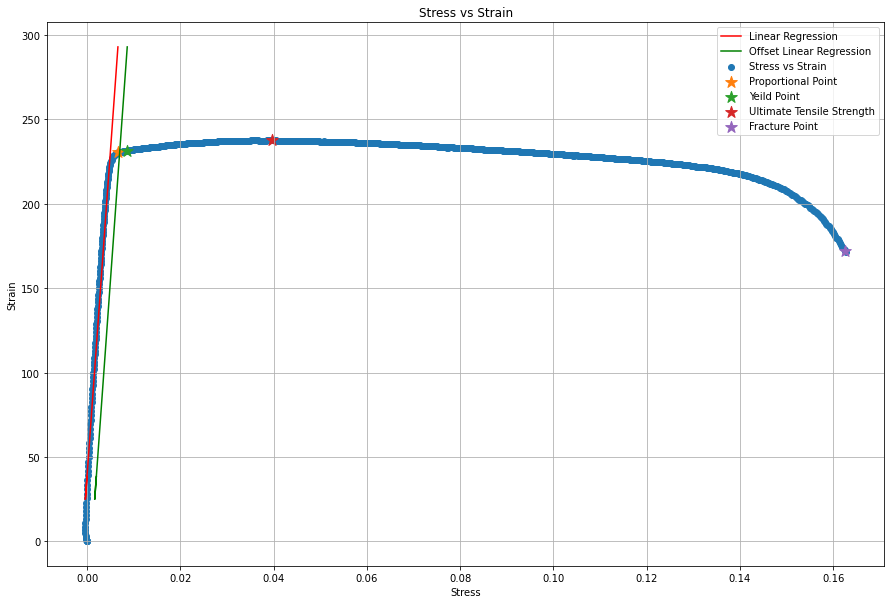

In [143]:
plt.subplots(figsize=[15,10])
plt.scatter(data["Strain"],data["Stress_MPa"], label="Stress vs Strain")
plt.plot(x,y_new,'r',label="Linear Regression")
plt.plot(xx,yy_new,'g',label="Offset Linear Regression")
plt.scatter(x1,y1,marker='*',s=150,label="Proportional Point")
plt.scatter(x2,y2,marker='*',s=150,label="Yield Point")
plt.scatter(x3,y3,marker='*',s=150,label="Ultimate Tensile Strength")
plt.scatter(x4,y4,marker='*',s=150,label="Fracture Point")
plt.title("Stress vs Strain")
plt.xlabel("Stress")
plt.ylabel("Strain")
plt.legend()
plt.grid()
plt.show()

In [146]:
print('Proportional limit:',data.iloc[prop_line]['Stress_MPa'],'MPa')
print('Yield Point:',y2, 'MPa')
print('Ultimate Tensile Strength:',y3, 'MPa')
print('Fracture limit:',y4, 'MPa')

Proportional limit: 230.3345189 MPa
Yield Point: 231.430147 MPa
Ultimate Tensile Strength: 237.5437267 MPa
Fracture limit: 172.1258821 MPa


In [149]:
print(round(r2_score(y,y_new),2))

0.95
